# Problem Statement


We need to predict the Sales based on the Features.

-->__Features or independent Variables

* Unnamed: 0
* TV
* radio
* newspaper

-->__Label/Target Variable

* sales

Refer SKlearn official Documnetation if yor are sure about syntax or parameter .

https://scikit-learn.org/stable/index.html

In [234]:
# Importing necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [235]:
# Importing Dataset

data = pd.read_csv('Advertising.csv')

In [236]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [237]:
data.shape

(200, 5)

In [238]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [239]:
# lets start Pre - Processing

In [240]:
data.drop(columns='Unnamed: 0',inplace = True)

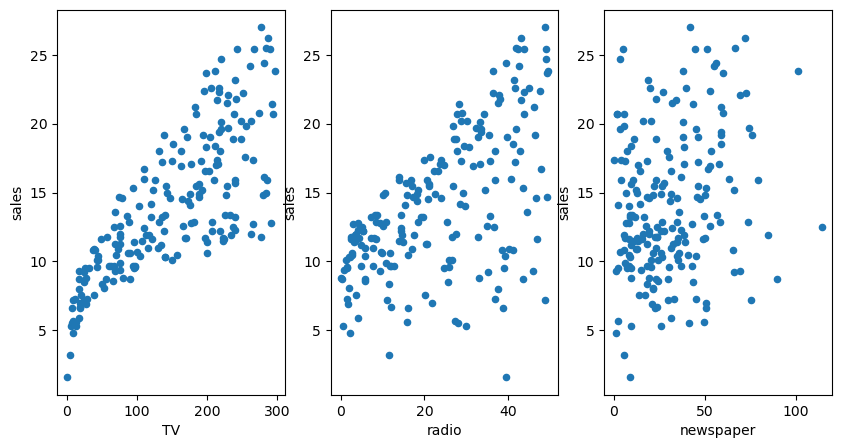

In [241]:
fig,axs=plt.subplots(1,3)
data.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(10,5))
data.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
data.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
plt.show()

In [242]:
# We clearly see that 'TV' has the best co-relation with the target variable - 'sales'.
# Also we cannot remove outliers because our dataset is very small.

In [243]:
# Now selecting best feature in terms of co relation with target variable.

In [244]:
X = data[['TV']]
y = data[['sales']]

In [245]:
# Creating Model Object:

In [246]:
lr = LinearRegression()
lr

LinearRegression()

In [247]:
# Now Train and Test our Dataset.

In [248]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=60)

In [249]:
# Now Normalize the data through Standard Scaler

In [250]:
scaler = StandardScaler()
scaler

StandardScaler()

In [251]:
X_train = scaler.fit_transform(X_train)

In [252]:
X_test = scaler.transform(X_test)

In [253]:
# Apply Simple Linear Regression and fit our training data

In [254]:
lr.fit(X_train,y_train)

LinearRegression()

In [255]:
# Now the co-efficient or slope and the intercept is:

In [256]:
print('Co-efficient / Slope = ',lr.coef_)
print('Intercept = ',lr.intercept_)

Co-efficient / Slope =  [[4.01719184]]
Intercept =  [13.93266667]


In [257]:
# Now predict the training data and plot the best fit line for it.

In [258]:
X_pred = lr.predict(X_train)

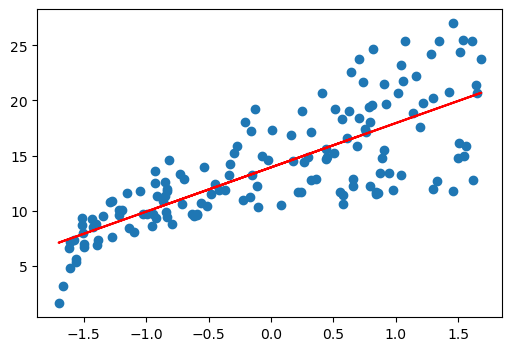

In [259]:
plt.figure(figsize=(6,4))
plt.scatter(X_train,y_train)
plt.plot(X_train,X_pred,color="r")

In [260]:
# Prediction for Test Data:

In [261]:
y_pred = lr.predict(X_test)

In [262]:
# Applying Performance Metrices for checking Error present in the model (Model Evaluation):

In [263]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
print("mae = ",mae)
print("mse = ",mse)
print("rmse =",np.sqrt(mse))

mae =  2.5875412036350247
mse =  10.566866545544817
rmse = 3.2506717068238093


In [264]:
# Now checking Model Confidence:

In [265]:
print("R2_score = ",r2_score(y_test,y_pred))

R2_score =  0.6243337485180489


In [266]:
# Now predict for any random value:

In [267]:
lr.predict([[60]])

array([[254.96417707]])

* So, above is the wrong prediction because we have to first normalize our datapoint for correct prediction

In [268]:
# Correct Prediction given below:

In [269]:
lr.predict(scaler.transform([[60]]))

array([[9.82263607]])

# Thank you